<a href="https://colab.research.google.com/github/chocopie0301/CS114.M11.KHCL/blob/main/BTTH/CS114_PredictRunTime_Edit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nhóm TTP


---
19/11/2021



In [48]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [24]:
df_train = pd.read_csv('data2.csv')
df_test = pd.read_csv('data3.csv')


In [25]:
df_train.head()

,Size,Time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [26]:
df_train.describe()

,Size,Time
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


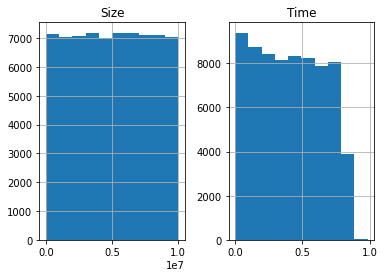

In [27]:
df_train.hist()
plt.show()

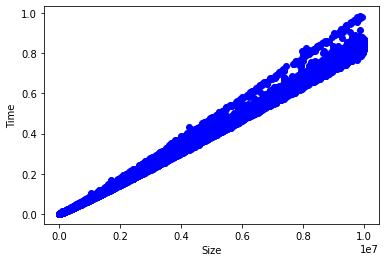

In [28]:
plt.scatter(df_train.Size, df_train.Time,  color='blue')
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()

In [29]:
X_train = df_train.loc[:, ['Size']].values
y_train = df_train.loc[:, ['Time']].values

X_test = df_test.loc[:, ['Size']].values
y_test = df_test.loc[:, ['Time']].values


## Chuẩn hóa dữ liệu

In [31]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)


## Huấn luyện mô hình và tính độ chính xác

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [45]:
# evaluate the model
#_, accuracy = model.evaluate(x_test, y_test)
#print('Accuracy: %.2f' % (accuracy*100))

In [41]:
score_mse = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error')
print("MSE  = ", score_mse.mean())

score_r2 = cross_val_score(model, X_test, y_test, scoring='r2')
print("R2  = ", score_r2.mean())

MSE  =  -0.01249449708758077
R2  =  0.9874802570998329


## Trực quang hóa dữ liệu

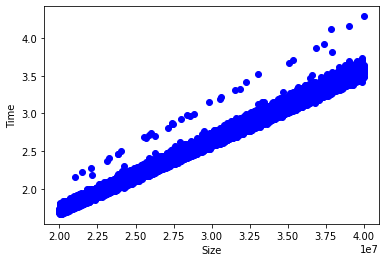

In [55]:
plt.scatter(df_test.Size, df_test.Time, color='blue')
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()

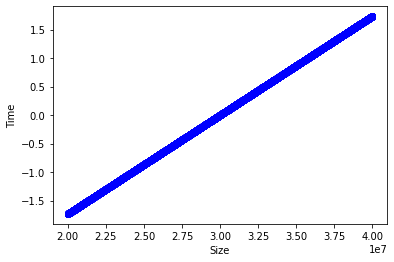

In [58]:
plt.scatter(df_test.Size, y_pred, color='blue')
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()